In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from nPoisson import PoissonSolver

%matplotlib inline

In [2]:
# read in vector field from file
df = pd.read_csv('./data/vectors_interp4.csv')

X = df['x'].values
Y = df['y'].values
vx = df['xt'].values
vy = df['yt'].values



vxx = vx.reshape(30,30)
vyy = vy.reshape(30,30)

vfield = np.stack((vxx, vyy), axis=2)
print vfield.shape

(30, 30, 2)


In [3]:
from nHHD import nHHD

dx = 560.0/29
dy = 440.0/29
grid = (30, 30)

decomposition_obj = nHHD(grid=grid, spacings=(dy, dx))

PoissonSolver: 2 D grid = (30, 30) with spacings (15.172413793103448, 19.310344827586206)

Initializing Poisson solver, type = F
  - creating distance kernel: (59, 59) 8.620689 712.17975  [[ elapsed time: 0.417 milli-sec. ]]
  - computing the Green's function: (59, 59) 0.342846 1.0453821  [[ elapsed time: 0.278 milli-sec. ]]
Poisson solver initialized  [[ elapsed time: 0.940 milli-sec. ]]


In [4]:
import time


start = time.time()

decomposition_obj.decompose(vfield, verbose=1)

print time.time() - start


 ==> nhhd.decompose (30, 30, 2)
div = (30, 30) -0.07213711081296512 0.12336769949259323
curlw = (30, 30) -0.3844195642687212 0.21097623232631169

Solving Poisson Eq.
Poisson solver finished  [[ elapsed time: 0.001 sec. ]]
nD = (30, 30) 4147.412209099202 5529.91354151185

Solving Poisson Eq.
Poisson solver finished  [[ elapsed time: 0.806 milli-sec. ]]
nR = (30, 30) -1057.7345908138016 731.7962818171249
d = (30, 30, 2) -6.22635127980068 6.04377638144807
r = (30, 30, 2) -13.265178356589049 11.555394867080826
h = (30, 30, 2) -2.071008503011165 3.1568127841896914
0.00480580329895


In [5]:
d = decomposition_obj.d
h = decomposition_obj.h
r = decomposition_obj.r

<IPython.core.display.Javascript object>


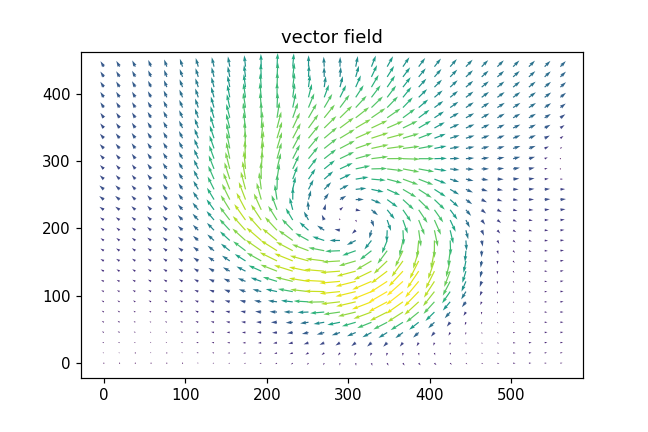

<IPython.core.display.Javascript object>


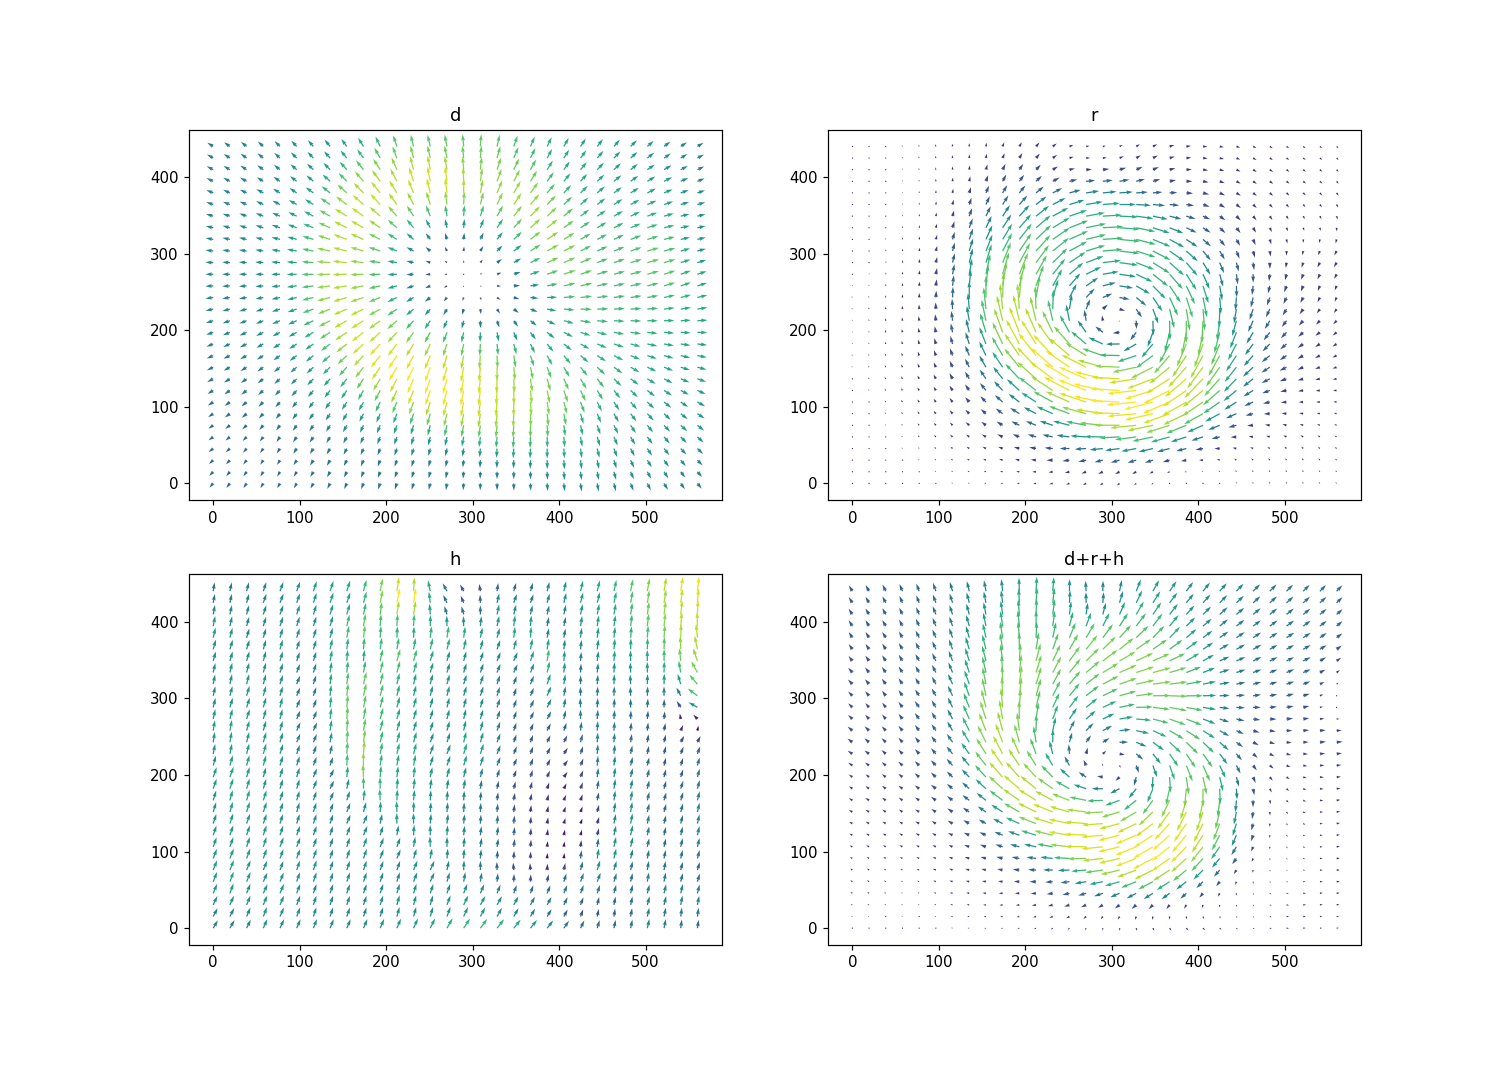

In [6]:
%matplotlib notebook

fig1, ax1 = plt.subplots()
ax1.set_title('vector field')

M = np.hypot(vx,  vy)
Q = ax1.quiver(X, Y, vx,  vy, M,  units='width')



start = time.time()
fig, ax = plt.subplots(2, 2, subplot_kw=dict(), figsize=(14, 10))
ax[0,0].set_title('d')
M = np.hypot(d[:,:,0],  d[:,:,1])
Q = ax[0,0].quiver(X, Y, d[:,:,0],  d[:,:,1], M,  units='width')


ax[0,1].set_title('r')
M = np.hypot(r[:,:,0],  r[:,:,1])
Q = ax[0,1].quiver(X, Y, r[:,:,0],  r[:,:,1], M,  units='width')


ax[1,0].set_title('h')
M = np.hypot(h[:,:,0],  h[:,:,1])
Q = ax[1,0].quiver(X, Y, h[:,:,0],  h[:,:,1], M,  units='width')


v = d+r+h
ax[1,1].set_title('d+r+h')
M = np.hypot(v[:,:,0],  v[:,:,1])
Q = ax[1,1].quiver(X, Y, v[:,:,0],  v[:,:,1], M,  units='width')
